In [38]:
from data_preprocessing import load_nfl_data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate as tb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [39]:
X, y = load_nfl_data('nfl-play-by-play-2009-2018.csv')

X = normalize(X)
y = normalize(y)

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
results = []
neighbors = np.arange(1, 31)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    results.append((k, score))

Best K: 14 with a score of 0.6042
Worst K: 7 with a score of 0.5486


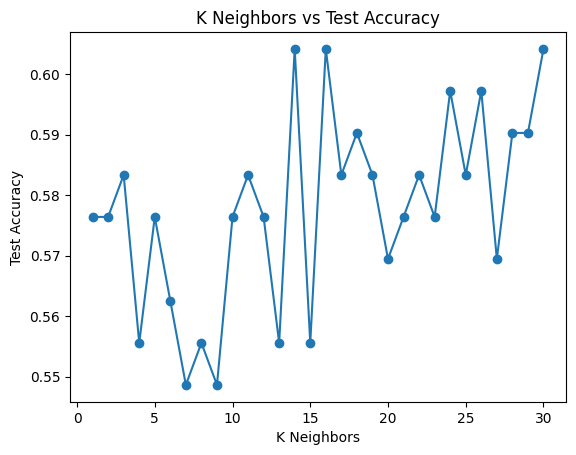

In [41]:
print(f'Best K: {(best := max(results, key=lambda x: x[1]))[0]} with a score of {best[1]:.4f}')
print(f'Worst K: {(worst := min(results, key=lambda x: x[1]))[0]} with a score of {worst[1]:.4f}')

plt.plot(*zip(*results), marker='o')
plt.title('K Neighbors vs Test Accuracy')
plt.xlabel('K Neighbors')
plt.ylabel('Test Accuracy')
plt.show()

In [42]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=best[0], weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68        88
           1       0.49      0.46      0.48        56

   micro avg       0.60      0.60      0.60       144
   macro avg       0.58      0.58      0.58       144
weighted avg       0.60      0.60      0.60       144
 samples avg       0.60      0.60      0.60       144

